In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


In [34]:

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cuda


In [35]:

# Hyperparameters
input_size = 32 * 32 * 3
hidden_size = 128
num_hidden_layers = 5
num_classes = 10
num_epochs = 25
batch_size = 128
learning_rate = 0.001


In [36]:

# CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=True, transform=transform, download=True)

val_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True)

val_loader = torch.utils.data.DataLoader(
    val_dataset, batch_size=batch_size, shuffle=False)



In [37]:

# Model Definition
class DeepMLP(nn.Module):
    def __init__(self):
        super(DeepMLP, self).__init__()

        layers = []

        # Input layer
        layers.append(nn.Linear(input_size, hidden_size))
        layers.append(nn.ReLU())

        # Hidden layers
        for _ in range(num_hidden_layers - 1):
            layers.append(nn.Linear(hidden_size, hidden_size))
            layers.append(nn.ReLU())

        # Output layer
        layers.append(nn.Linear(hidden_size, num_classes))

        self.model = nn.Sequential(*layers)

        # for m in self.modules():
        #     if isinstance(m, nn.Linear):
        #         nn.init.kaiming_normal_(m.weight, nonlinearity='relu')
        #         nn.init.zeros_(m.bias)


    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten
        return self.model(x)


model = DeepMLP().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)



In [38]:

# Training Loop
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct / total

    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Validation
    model.eval()
    val_running_loss = 0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            val_running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_loss = val_running_loss / len(val_loader)
    val_accuracy = 100 * val_correct / val_total

    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {train_loss:.4f}, "
          f"Train Acc: {train_accuracy:.2f}% | "
          f"Val Loss: {val_loss:.4f}, "
          f"Val Acc: {val_accuracy:.2f}%")


Epoch [1/25] Train Loss: 1.7324, Train Acc: 37.66% | Val Loss: 1.5526, Val Acc: 45.11%
Epoch [2/25] Train Loss: 1.4952, Train Acc: 46.88% | Val Loss: 1.4662, Val Acc: 48.19%
Epoch [3/25] Train Loss: 1.3805, Train Acc: 50.79% | Val Loss: 1.4010, Val Acc: 49.49%
Epoch [4/25] Train Loss: 1.2922, Train Acc: 54.05% | Val Loss: 1.3756, Val Acc: 51.04%
Epoch [5/25] Train Loss: 1.2255, Train Acc: 56.20% | Val Loss: 1.3554, Val Acc: 52.25%
Epoch [6/25] Train Loss: 1.1617, Train Acc: 58.59% | Val Loss: 1.3735, Val Acc: 52.67%
Epoch [7/25] Train Loss: 1.1067, Train Acc: 60.46% | Val Loss: 1.3589, Val Acc: 52.44%
Epoch [8/25] Train Loss: 1.0588, Train Acc: 62.38% | Val Loss: 1.3514, Val Acc: 52.78%
Epoch [9/25] Train Loss: 1.0105, Train Acc: 63.91% | Val Loss: 1.3808, Val Acc: 53.37%
Epoch [10/25] Train Loss: 0.9694, Train Acc: 65.34% | Val Loss: 1.4031, Val Acc: 53.03%
Epoch [11/25] Train Loss: 0.9307, Train Acc: 66.80% | Val Loss: 1.4397, Val Acc: 53.22%
Epoch [12/25] Train Loss: 0.8849, Train A

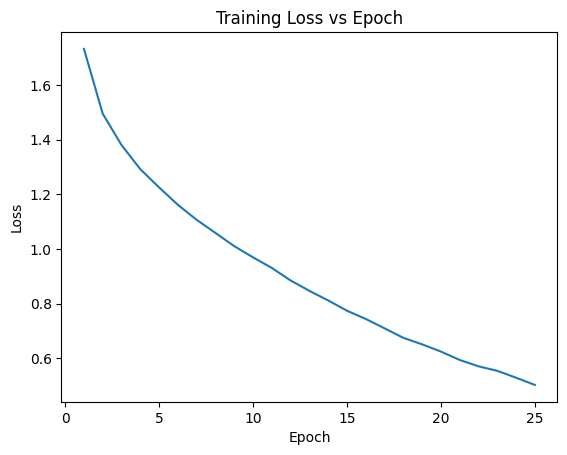

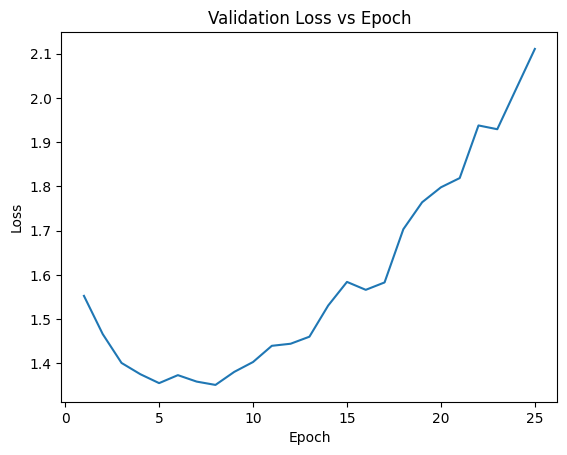

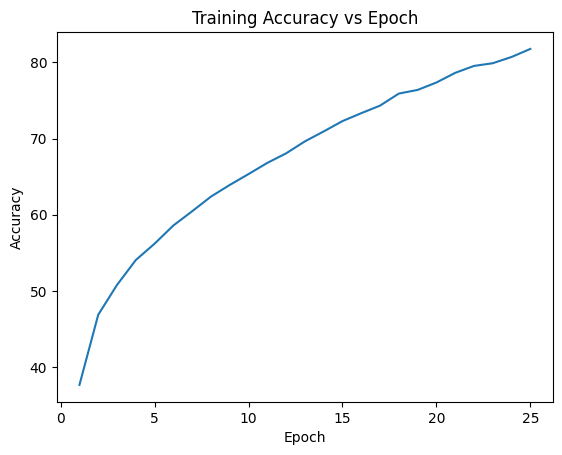

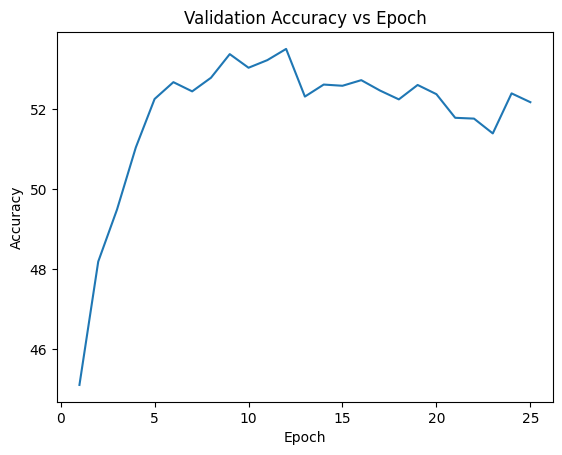

In [39]:

# Plotting
epochs = range(1, num_epochs + 1)

plt.figure()
plt.plot(epochs, train_losses)
plt.title("Training Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

plt.figure()
plt.plot(epochs, val_losses)
plt.title("Validation Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

plt.figure()
plt.plot(epochs, train_accuracies)
plt.title("Training Accuracy vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

plt.figure()
plt.plot(epochs, val_accuracies)
plt.title("Validation Accuracy vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()


In [40]:
# Experiment Logging
import os
from datetime import datetime

# Create folder if not exists
os.makedirs("experiment_logs", exist_ok=True)

file_path = "ExperimentLogs.txt"

activation_name = "ReLU" 

with open(file_path, "a") as f:
    f.write("="*60 + "\n")
    f.write(f"Experiment Date: {datetime.now()}\n")
    f.write(f"Activation Function: {activation_name}\n")
    f.write(f"Hidden Layers: {num_hidden_layers}\n")
    f.write(f"Neurons per Layer: {hidden_size}\n")
    f.write(f"Optimizer: Adam\n")
    f.write(f"Learning Rate: {learning_rate}\n")
    f.write(f"Batch Size: {batch_size}\n")
    f.write(f"Epochs: {num_epochs}\n\n")

    f.write("Epoch-wise Results:\n")

    for i in range(num_epochs):
        f.write(
            f"Epoch {i+1}: "
            f"Train Loss={train_losses[i]:.4f}, "
            f"Train Acc={train_accuracies[i]:.2f}%, "
            f"Val Loss={val_losses[i]:.4f}, "
            f"Val Acc={val_accuracies[i]:.2f}%\n"
        )

    f.write("\nFinal Results:\n")
    f.write(f"Final Train Accuracy: {train_accuracies[-1]:.2f}%\n")
    f.write(f"Final Validation Accuracy: {val_accuracies[-1]:.2f}%\n")
    f.write("="*60 + "\n\n")

print("Results saved to:", file_path)


Results saved to: ExperimentLogs.txt
